In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import warnings

import folium
from folium.plugins import MarkerCluster
import folium.features 
warnings.filterwarnings(action='ignore')

In [2]:
# 데이터 불러오기 
sb1907 = pd.read_csv('datas/sb1907.csv')
sb1908 = pd.read_csv('datas/sb1908.csv')
sb2007 = pd.read_csv('datas/sb2007.csv')
sb2008 = pd.read_csv('datas/sb2008.csv')

station = pd.read_csv('datas/station.csv')

In [3]:
# 데이터 프레임 모든 로우값 보기 
pd.set_option('display.max_rows', None)

In [4]:
sb2001 = pd.read_csv('datas/sb2001.csv')
sb2002 = pd.read_csv('datas/sb2002.csv')
sb2003 = pd.read_csv('datas/sb2003.csv')
sb2004 = pd.read_csv('datas/sb2004.csv')

In [5]:
rent_date2001 = sb2001['rental_day'].value_counts().sort_index()
rent_date2001

2020-01-01    15697
2020-01-02    27841
2020-01-03    29657
2020-01-04    24708
2020-01-05    22391
2020-01-06    14848
2020-01-07     1859
2020-01-08    20779
2020-01-09    27659
2020-01-10    28315
2020-01-11    22370
2020-01-12    19193
2020-01-13    25826
2020-01-14    27383
2020-01-15    27220
2020-01-16    27982
2020-01-17    28567
2020-01-18    23779
2020-01-19    17115
2020-01-20    27690
2020-01-21    29595
2020-01-22    31904
2020-01-23    33221
2020-01-24    18536
2020-01-25    14712
2020-01-26    21899
2020-01-27    16289
2020-01-28    30888
2020-01-29    36530
2020-01-30    36663
2020-01-31    34184
Name: rental_day, dtype: int64

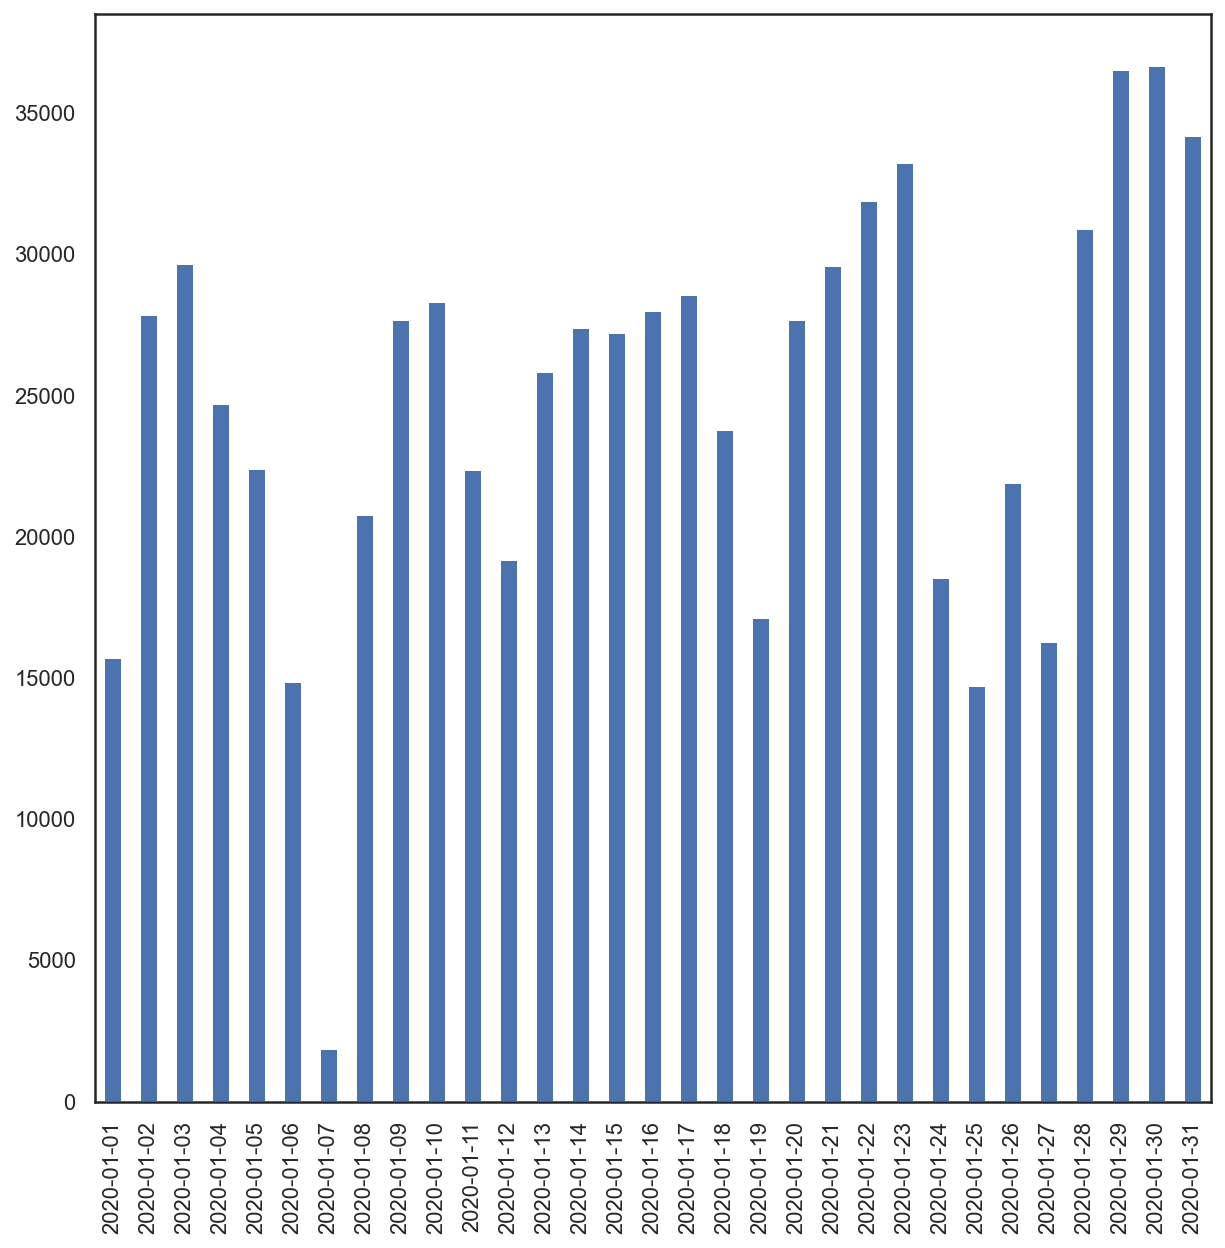

In [6]:
plt.figure(figsize=(10,10))
rent_date2001.plot.bar()
plt.rc('font',family='AppleGothic')
plt.show()

In [8]:
sb1907.head()

,rental_station_num,rental_station_name,return_station_num,return_station_name,using_time,using_distance,rental_day,rental_time,return_day,bicycle_type_num
0,153,성산2교 사거리,934,신사동 성당,43,6160.0,2019-07-01,00:49:10,01:33:11,1
1,2373,개포동역 사거리,2246,서울시 품질시험소 앞,19,4540.0,2019-07-01,08:20:55,08:40:42,1
2,2255,시민의숲역 1번출구 옆,2246,서울시 품질시험소 앞,9,1550.0,2019-07-01,08:35:20,08:44:56,1
3,2255,시민의숲역 1번출구 옆,2246,서울시 품질시험소 앞,7,1240.0,2019-07-01,08:37:26,08:45:25,1
4,2255,시민의숲역 1번출구 옆,2246,서울시 품질시험소 앞,6,1420.0,2019-07-01,08:41:45,08:48:40,1


In [4]:
rent_date1907 = sb1907['rental_day'].value_counts().sort_index()
rent_date1907

2019-07-01    89237
2019-07-02    91134
2019-07-03    91018
2019-07-04    86945
2019-07-05    80890
2019-07-06    67641
2019-07-07    72353
2019-07-08    89995
2019-07-09    92287
2019-07-10    42135
2019-07-11    62576
2019-07-12    91082
2019-07-13    78130
2019-07-14    71400
2019-07-15    55741
2019-07-16    79101
2019-07-17    81062
2019-07-18    78554
2019-07-19    74479
2019-07-20    54444
2019-07-21    44449
2019-07-22    79653
2019-07-23    80002
2019-07-24    56779
2019-07-25    33619
2019-07-26    21921
2019-07-27    49063
2019-07-28    22475
2019-07-29    71392
2019-07-30    67193
2019-07-31    25861
Name: rental_day, dtype: int64

In [5]:
rent_1907 = sb1907['rental_day'].value_counts().rename_axis('date').reset_index(name='counts')
rent_1907 = rent_1907.sort_values('date')
rent_1907 = rent_1907.pivot_table(index="date", values='date')
rent_1907

,counts
date,
2019-07-01,89237
2019-07-02,91134
2019-07-03,91018
2019-07-04,86945
2019-07-05,80890
2019-07-06,67641
2019-07-07,72353
2019-07-08,89995
2019-07-09,92287


<Figure size 3600x3600 with 0 Axes>

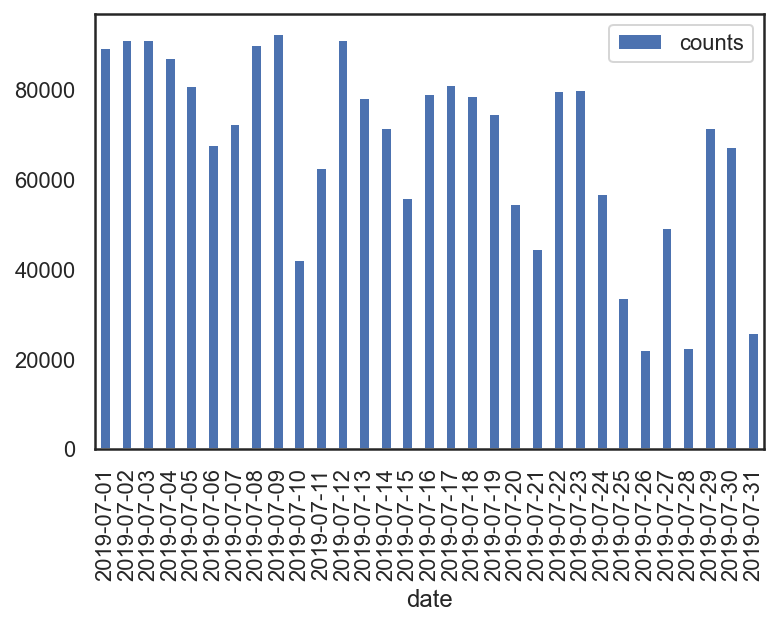

In [6]:
plt.figure(figsize=(50,50))
rent_1907.plot.bar()
plt.rc('font',family='AppleGothic')
plt.show()

In [9]:
sb1907.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2082611 entries, 0 to 2082610
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   rental_station_num   int64  
 1   rental_station_name  object 
 2   return_station_num   int64  
 3   return_station_name  object 
 4   using_time           int64  
 5   using_distance       float64
 6   rental_day           object 
 7   rental_time          object 
 8   return_day           object 
 9   bicycle_type_num     int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 158.9+ MB


In [10]:
sb1908.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028698 entries, 0 to 2028697
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   rental_station_num   int64  
 1   rental_station_name  object 
 2   return_station_num   int64  
 3   return_station_name  object 
 4   using_time           int64  
 5   using_distance       float64
 6   rental_day           object 
 7   rental_time          object 
 8   return_day           object 
 9   bicycle_type_num     int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 154.8+ MB


In [11]:
sb2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353719 entries, 0 to 1353718
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   rental_station_num   1353719 non-null  int64  
 1   rental_station_name  1353719 non-null  object 
 2   return_station_num   1353719 non-null  int64  
 3   return_station_name  1353719 non-null  object 
 4   using_time           1353719 non-null  int64  
 5   using_distance       1353719 non-null  float64
 6   rental_day           1353719 non-null  object 
 7   rental_time          1353719 non-null  object 
 8   return_day           1353719 non-null  object 
 9   bicycle_type_num     1353719 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 103.3+ MB


In [12]:
sb2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900358 entries, 0 to 900357
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   rental_station_num   900358 non-null  int64  
 1   rental_station_name  900358 non-null  object 
 2   return_station_num   900358 non-null  int64  
 3   return_station_name  900358 non-null  object 
 4   using_time           900358 non-null  int64  
 5   using_distance       900358 non-null  float64
 6   rental_day           900358 non-null  object 
 7   rental_time          900358 non-null  object 
 8   return_day           900358 non-null  object 
 9   bicycle_type_num     900358 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 68.7+ MB


In [13]:
# 19년 7월 오름차순으로 정렬 
s1907 = sb1907['rental_day'].value_counts().sort_index()
s1907

2019-07-01    89237
2019-07-02    91134
2019-07-03    91018
2019-07-04    86945
2019-07-05    80890
2019-07-06    67641
2019-07-07    72353
2019-07-08    89995
2019-07-09    92287
2019-07-10    42135
2019-07-11    62576
2019-07-12    91082
2019-07-13    78130
2019-07-14    71400
2019-07-15    55741
2019-07-16    79101
2019-07-17    81062
2019-07-18    78554
2019-07-19    74479
2019-07-20    54444
2019-07-21    44449
2019-07-22    79653
2019-07-23    80002
2019-07-24    56779
2019-07-25    33619
2019-07-26    21921
2019-07-27    49063
2019-07-28    22475
2019-07-29    71392
2019-07-30    67193
2019-07-31    25861
Name: rental_day, dtype: int64

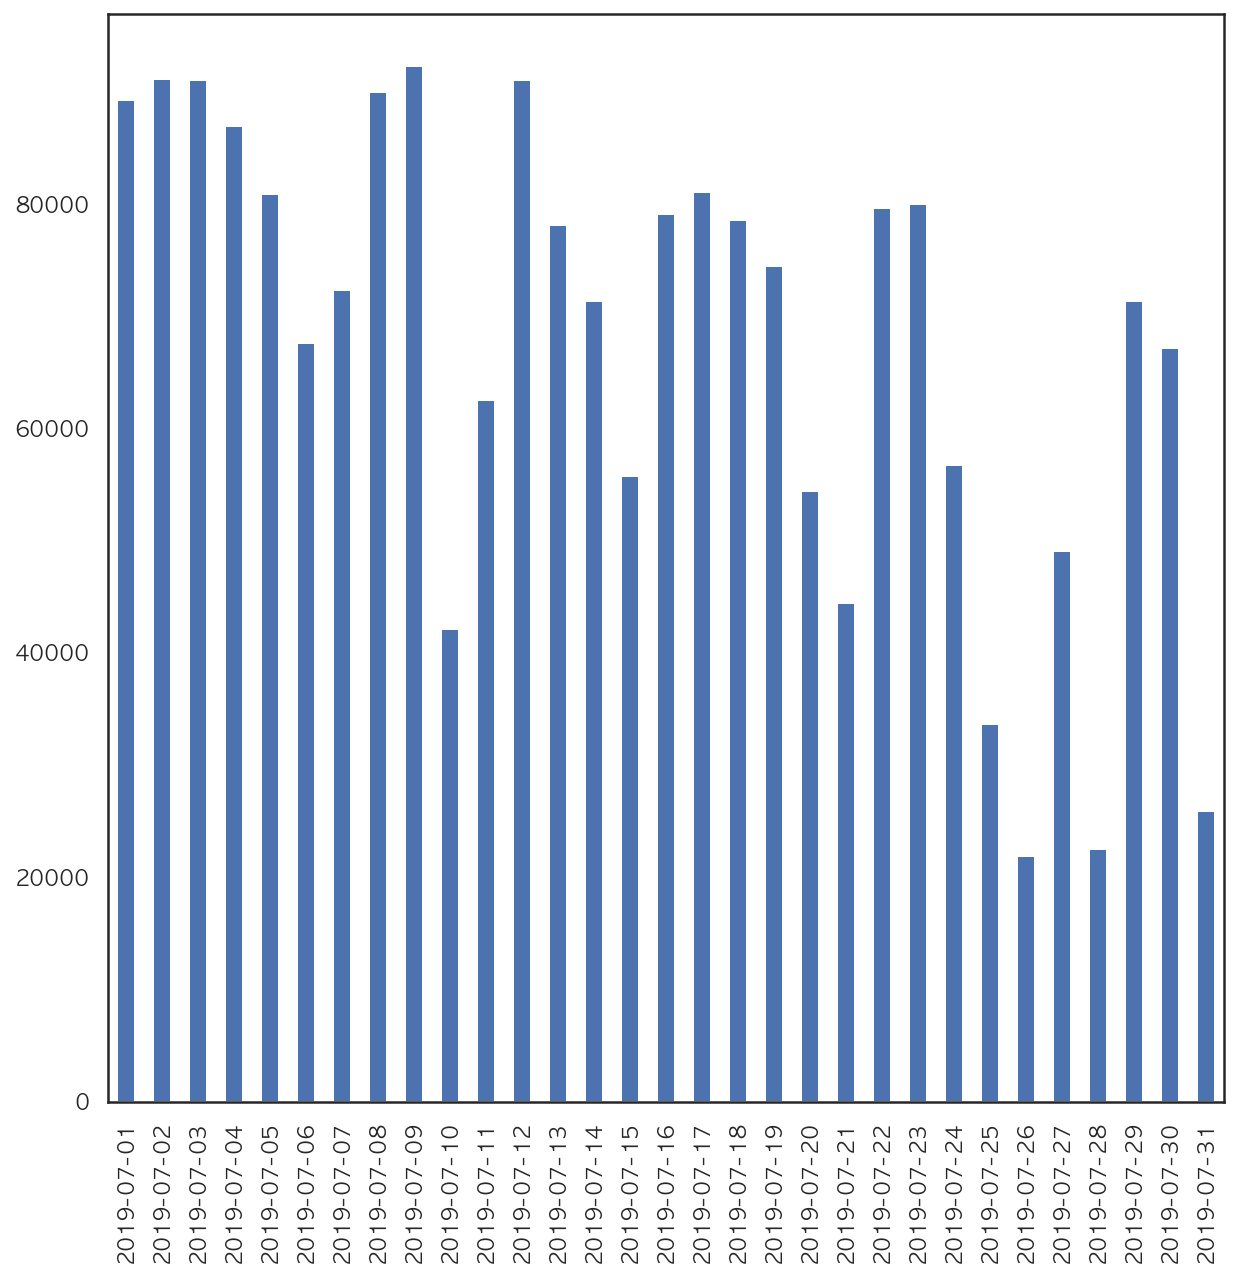

In [14]:
plt.figure(figsize=(10,10))
s1907.plot.bar()
plt.rc('font',family='AppleGothic')
plt.show()

In [15]:
# 19년 8월 오름차순으로 정렬 
s1908 = sb1908['rental_day'].value_counts().sort_index()
s1908

2019-08-01    57823
2019-08-02    65097
2019-08-03    47433
2019-08-04    44827
2019-08-05    62869
2019-08-06    64347
2019-08-07    49043
2019-08-08    67410
2019-08-09    65196
2019-08-10    52359
2019-08-11    41856
2019-08-12    23581
2019-08-13    61594
2019-08-14    63232
2019-08-15    31142
2019-08-16    68734
2019-08-17    69874
2019-08-18    70199
2019-08-19    78889
2019-08-20    79320
2019-08-21    54994
2019-08-22    79388
2019-08-23    83698
2019-08-24    82656
2019-08-25    78193
2019-08-26    84660
2019-08-27    80087
2019-08-28    85463
2019-08-29    63427
2019-08-30    83674
2019-08-31    87633
Name: rental_day, dtype: int64

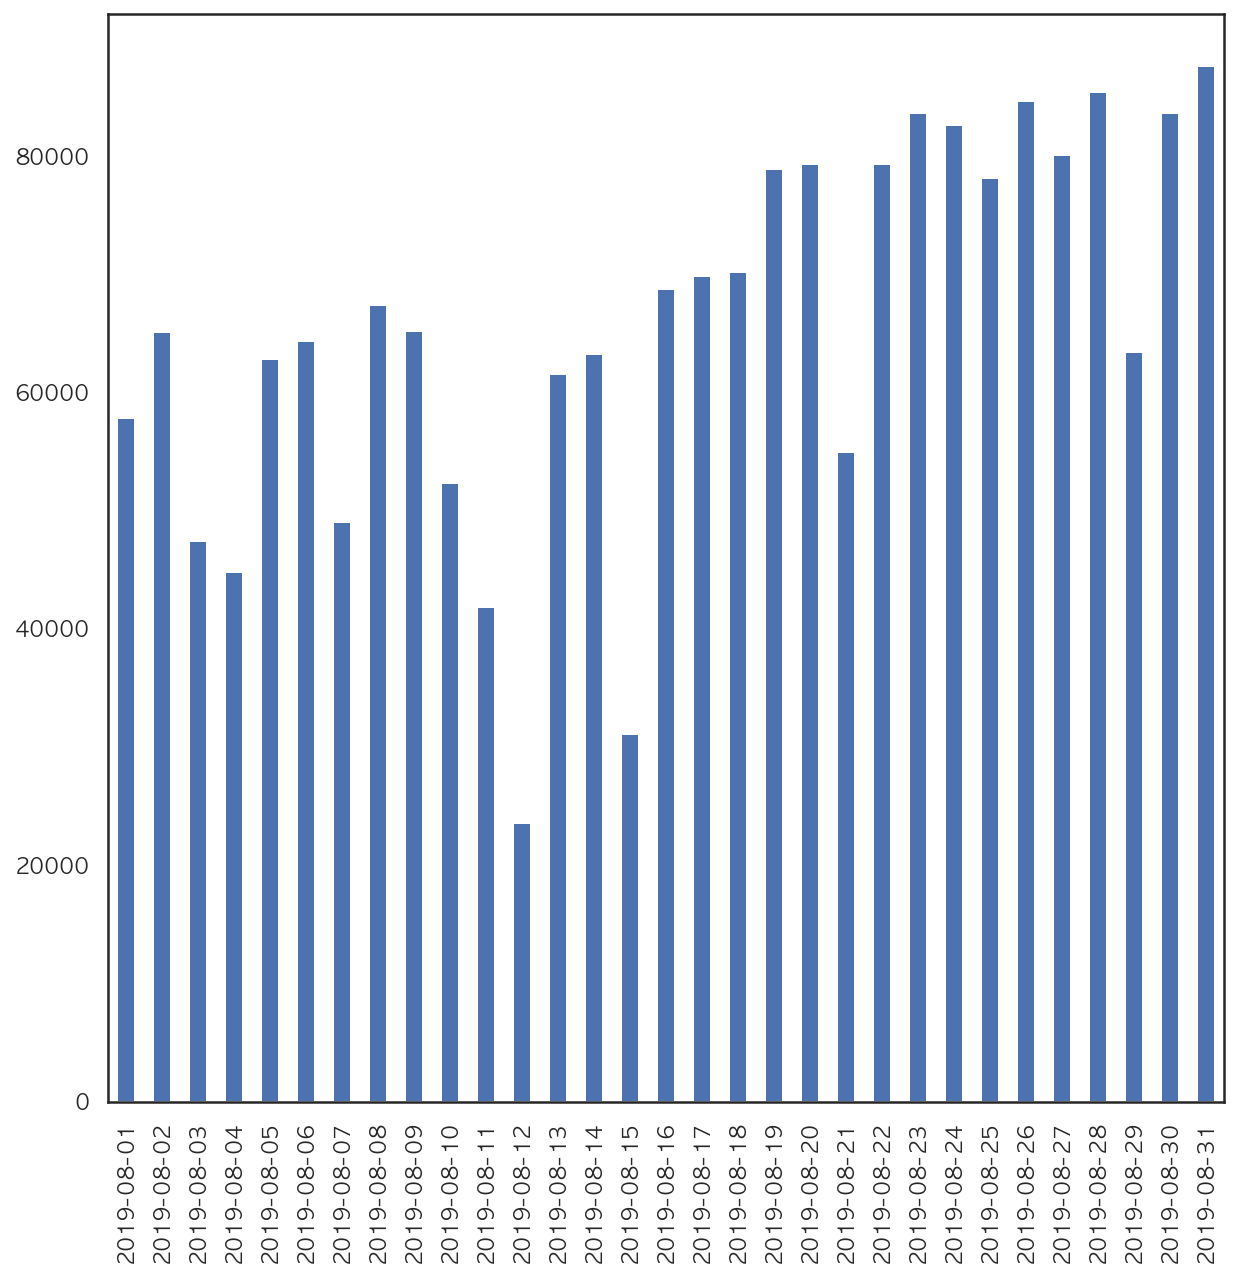

In [12]:
plt.figure(figsize=(10,10))
s1908.plot.bar()
plt.rc('font',family='AppleGothic')
plt.show()

In [16]:
# 20년 7월 오름차순으로 정렬 
s2007 = sb2007['rental_day'].value_counts().sort_index()
s2007

2020-07-01    62268
2020-07-02    63555
2020-07-03    59109
2020-07-04    55489
2020-07-05    57900
2020-07-06    57702
2020-07-07    49578
2020-07-08    56861
2020-07-09    53623
2020-07-10    46332
2020-07-11    52784
2020-07-12    28205
2020-07-13     2295
2020-07-14    42908
2020-07-15    54255
2020-07-16    51762
2020-07-17    50070
2020-07-18    49510
2020-07-19    29750
2020-07-20    35635
2020-07-21    50671
2020-07-22    23190
2020-07-23     5419
2020-07-24    39153
2020-07-25    52467
2020-07-26    47921
2020-07-27    26454
2020-07-28    34664
2020-07-29    16232
2020-07-30    48316
2020-07-31    49641
Name: rental_day, dtype: int64

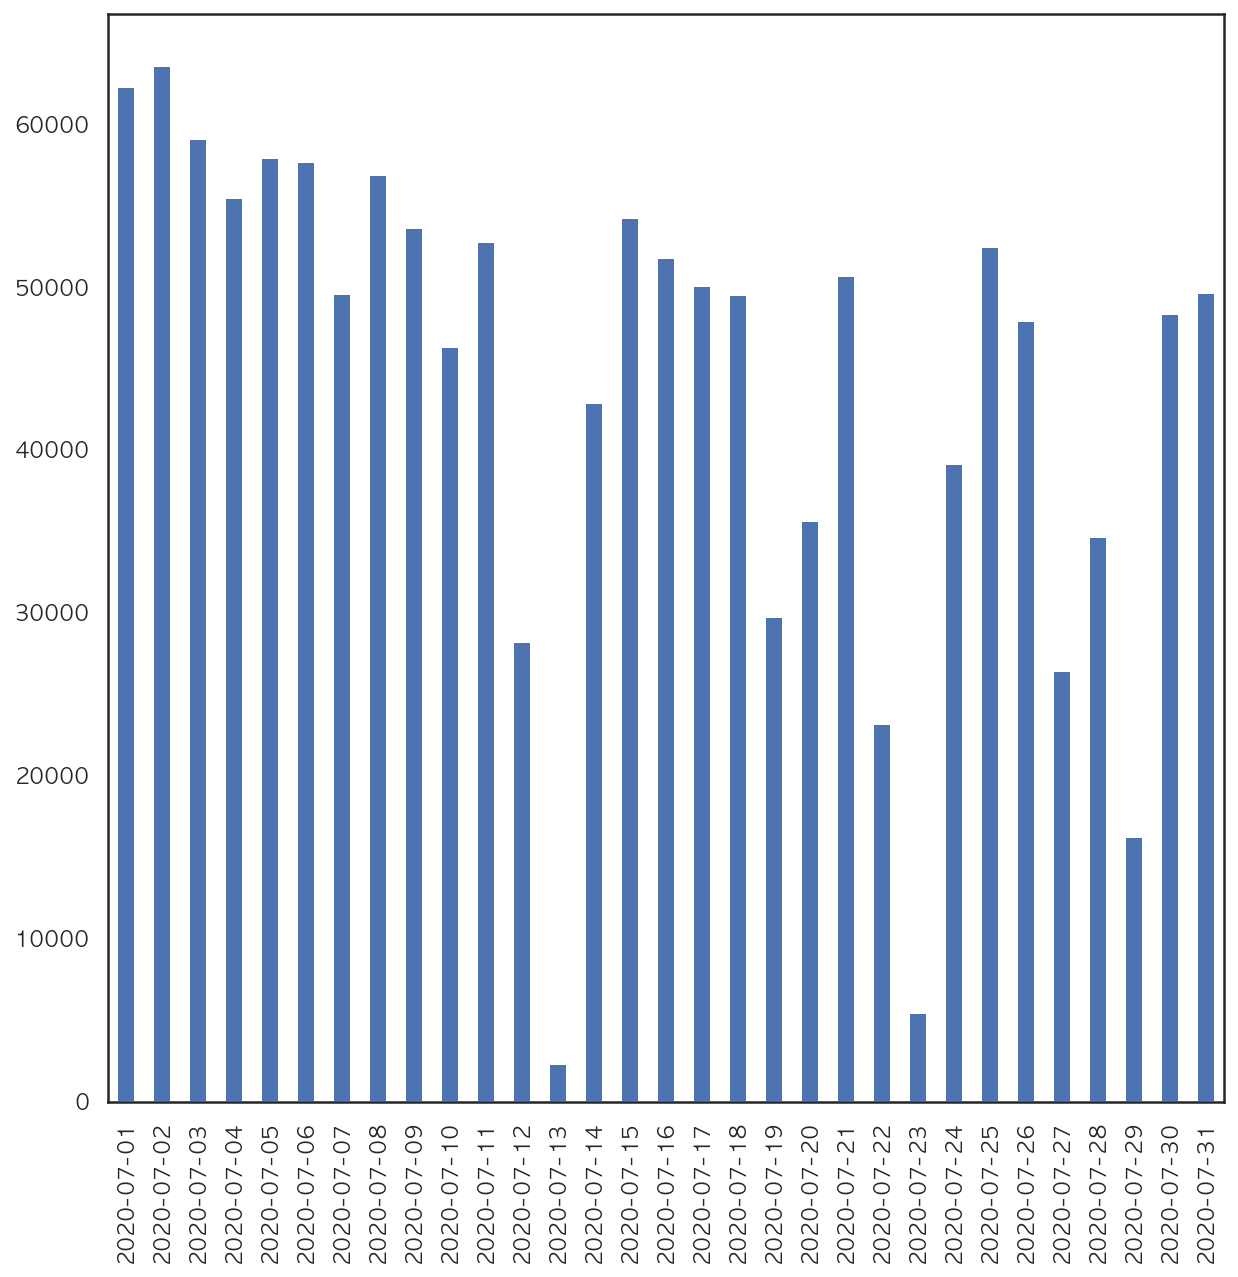

In [17]:
plt.figure(figsize=(10,10))
s2007.plot.bar()
plt.rc('font',family='AppleGothic')
plt.show()

In [17]:
# 20년 8월 오름차순으로 정렬 
s2008 = sb2008['rental_day'].value_counts().sort_index()
s2008

2020-08-01    18141
2020-08-02     6084
2020-08-03     9284
2020-08-04    26254
2020-08-05    15523
2020-08-06    27513
2020-08-07    42097
2020-08-08    21459
2020-08-09     6603
2020-08-10    12677
2020-08-11    27373
2020-08-12    41454
2020-08-13    42006
2020-08-14    38231
2020-08-15    13968
2020-08-16    35060
2020-08-17    38968
2020-08-18    42950
2020-08-19    43951
2020-08-20    43819
2020-08-21    40144
2020-08-22    21097
2020-08-23    40786
2020-08-24    45988
2020-08-25    44519
2020-08-26    20660
2020-08-27    16385
2020-08-28    30772
2020-08-29    17037
2020-08-30    26441
2020-08-31    43114
Name: rental_day, dtype: int64

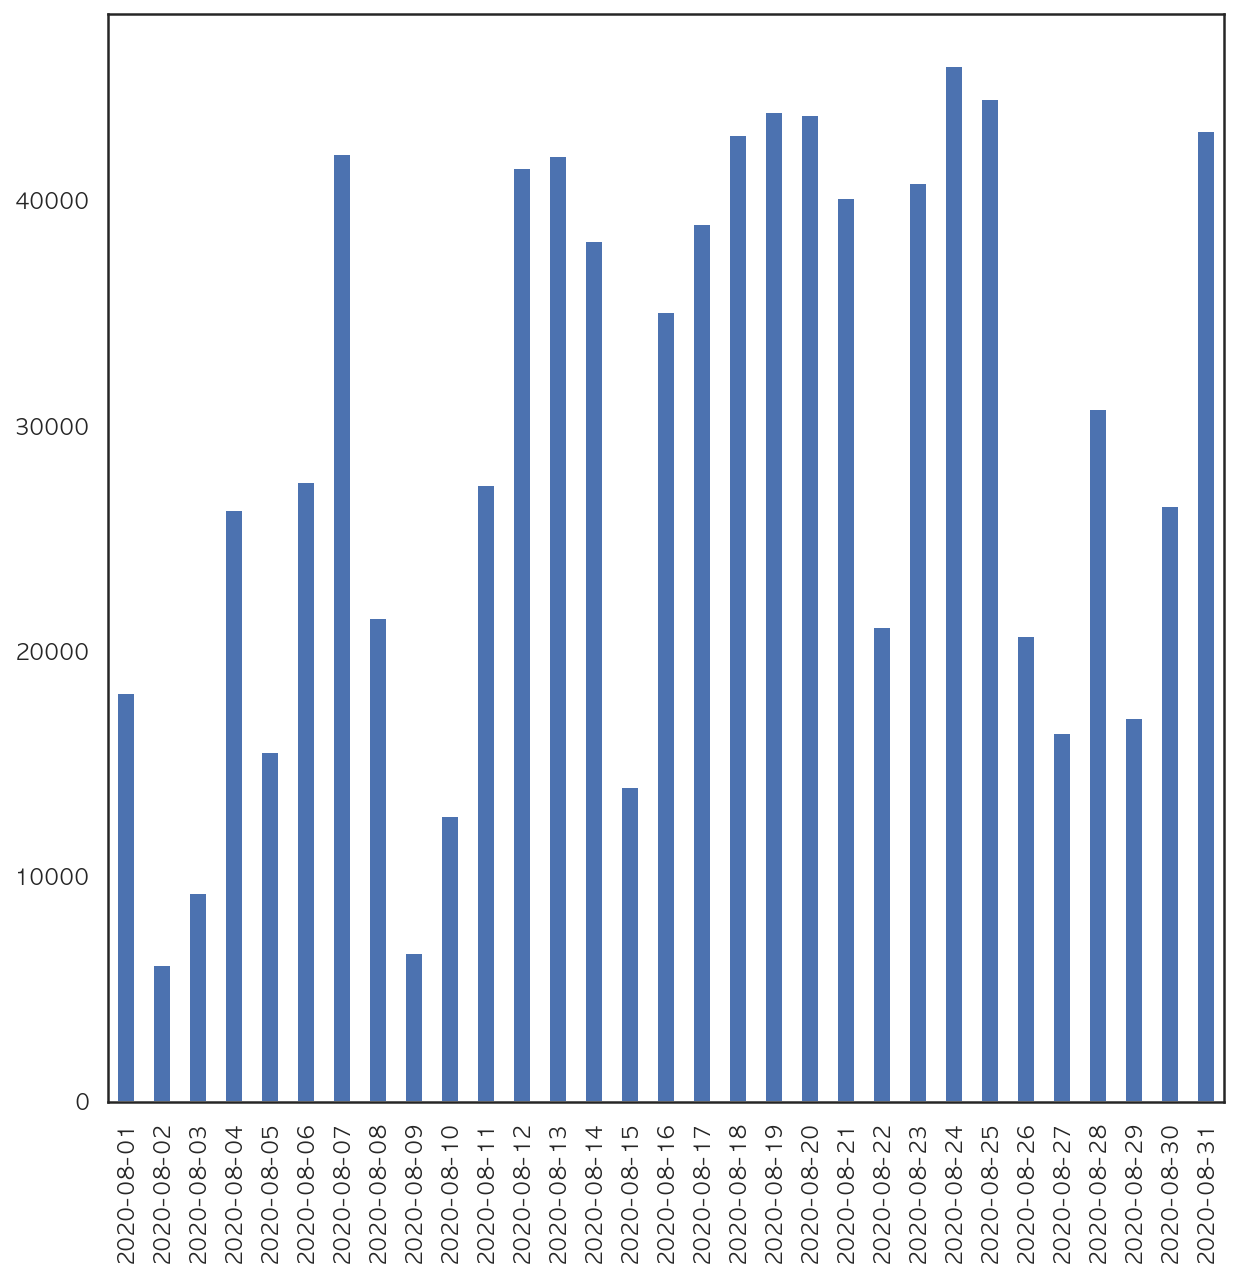

In [18]:
plt.figure(figsize=(10,10))
s2008.plot.bar()
plt.rc('font',family='AppleGothic')
plt.show()

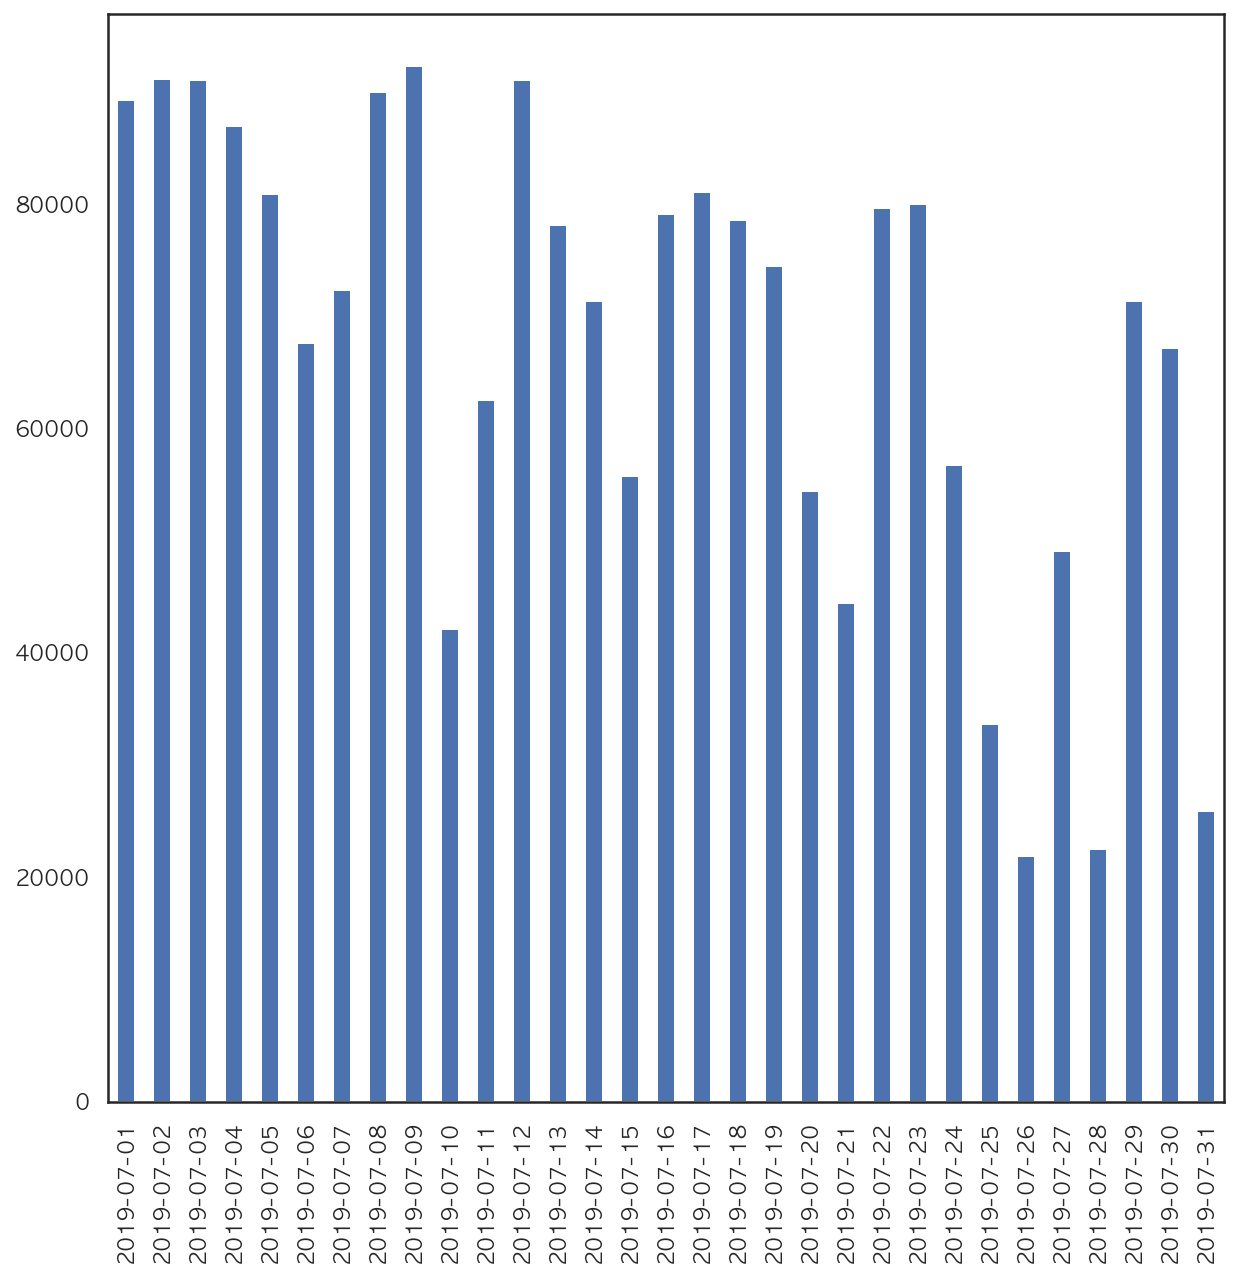

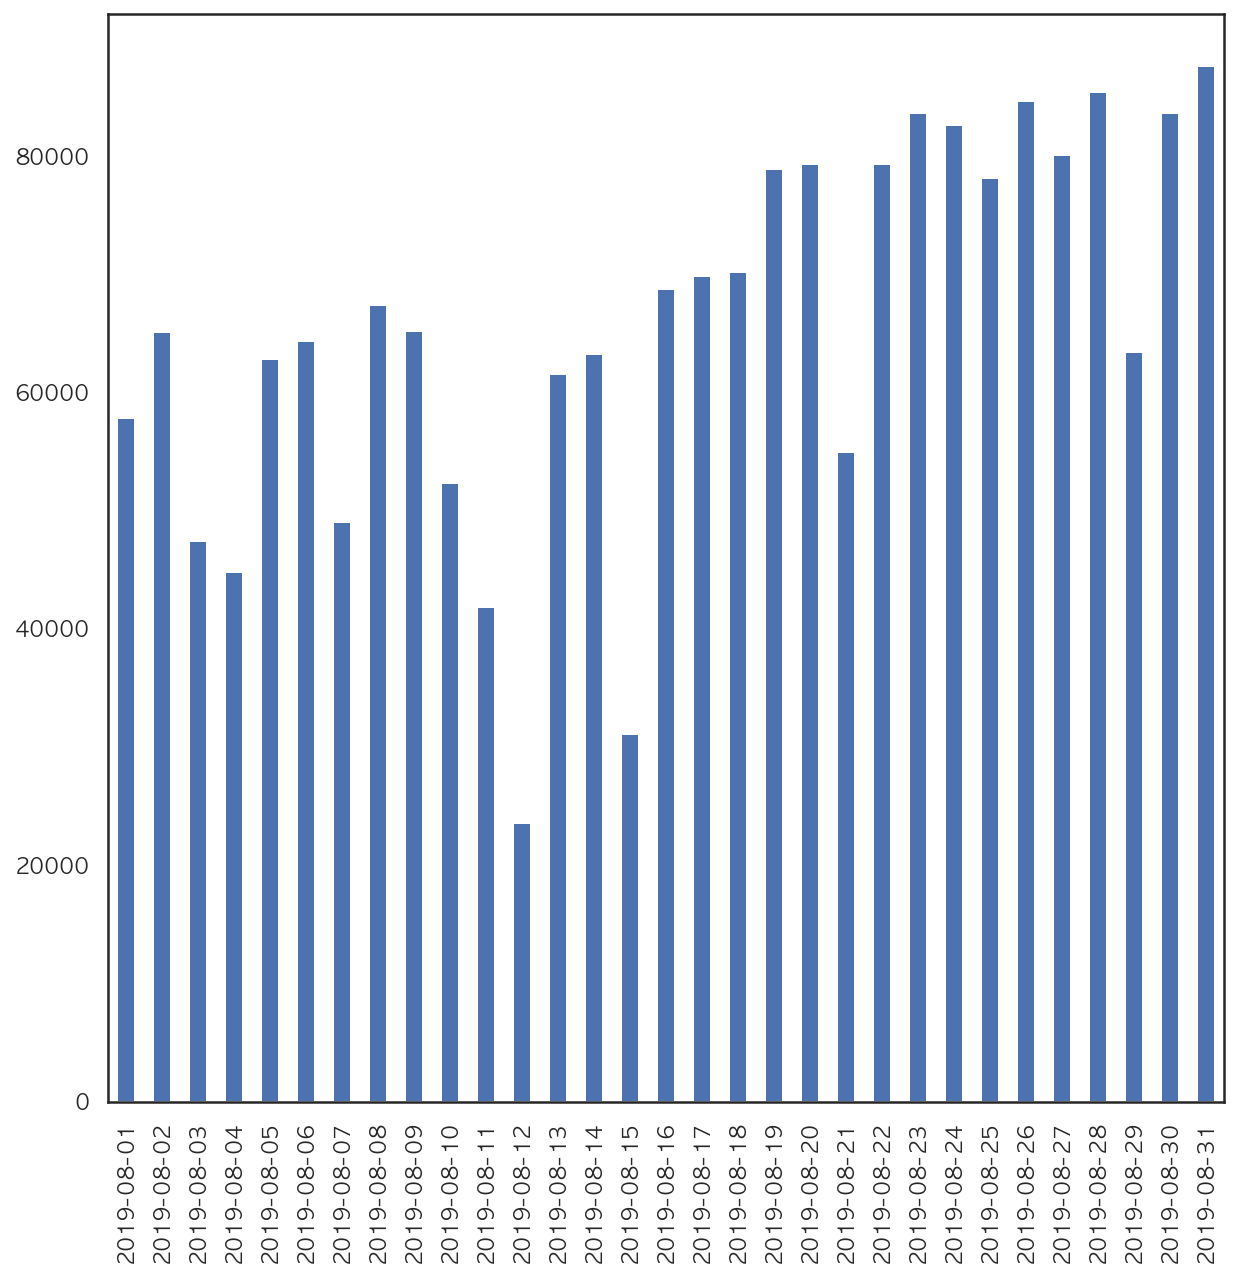

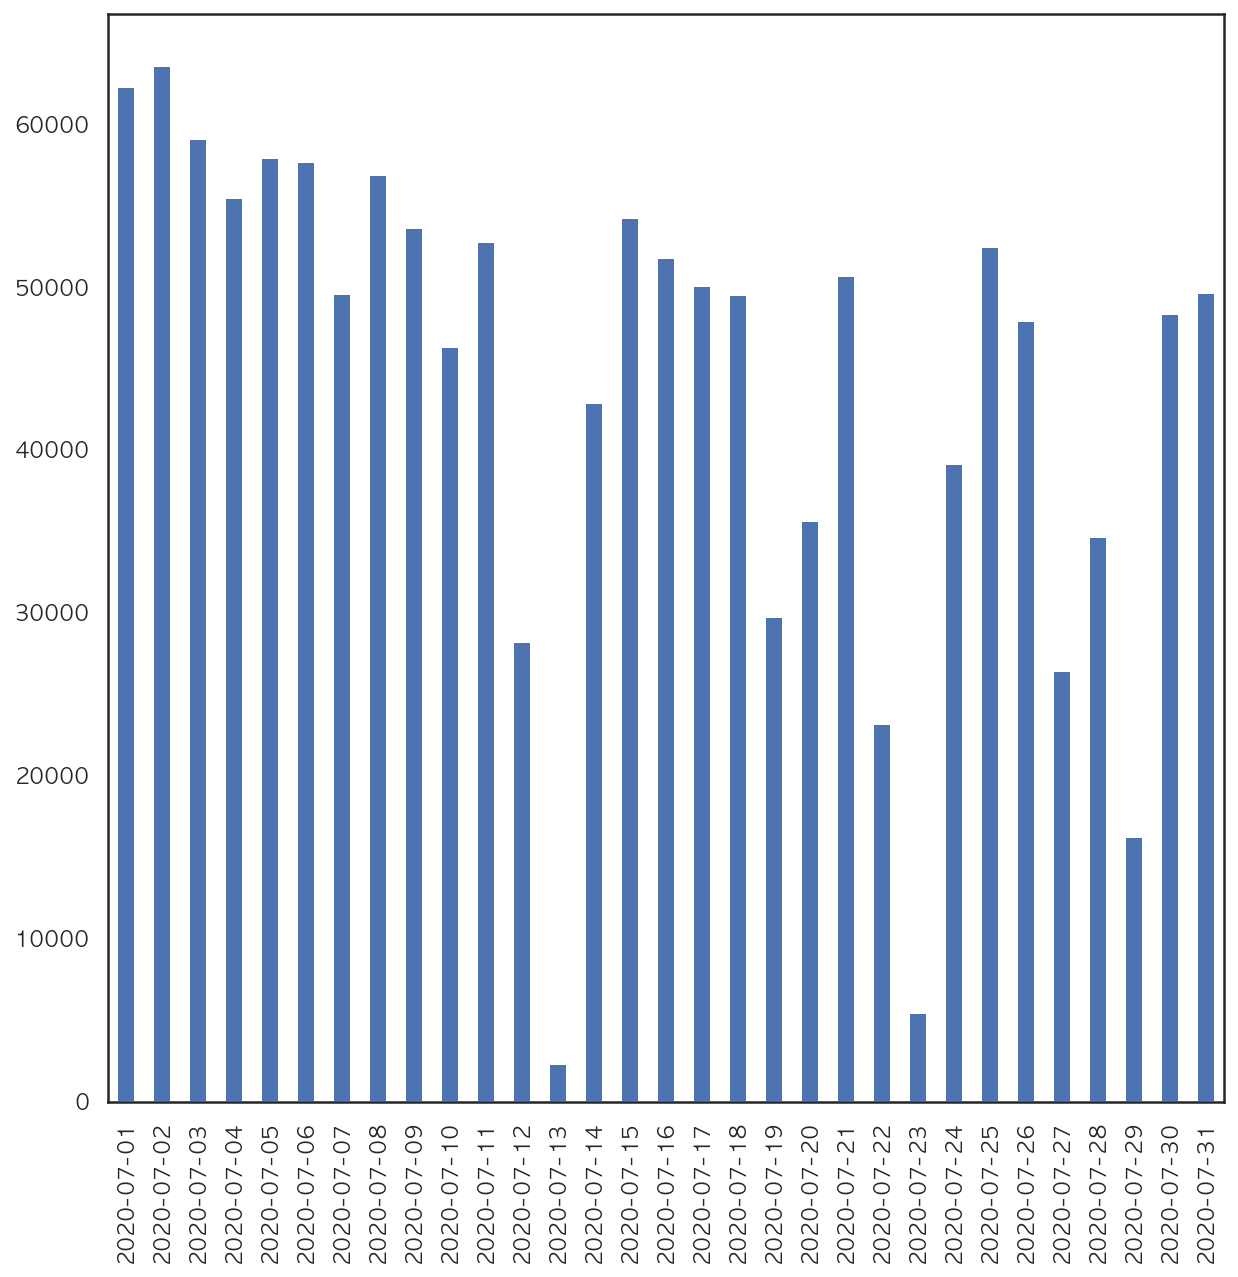

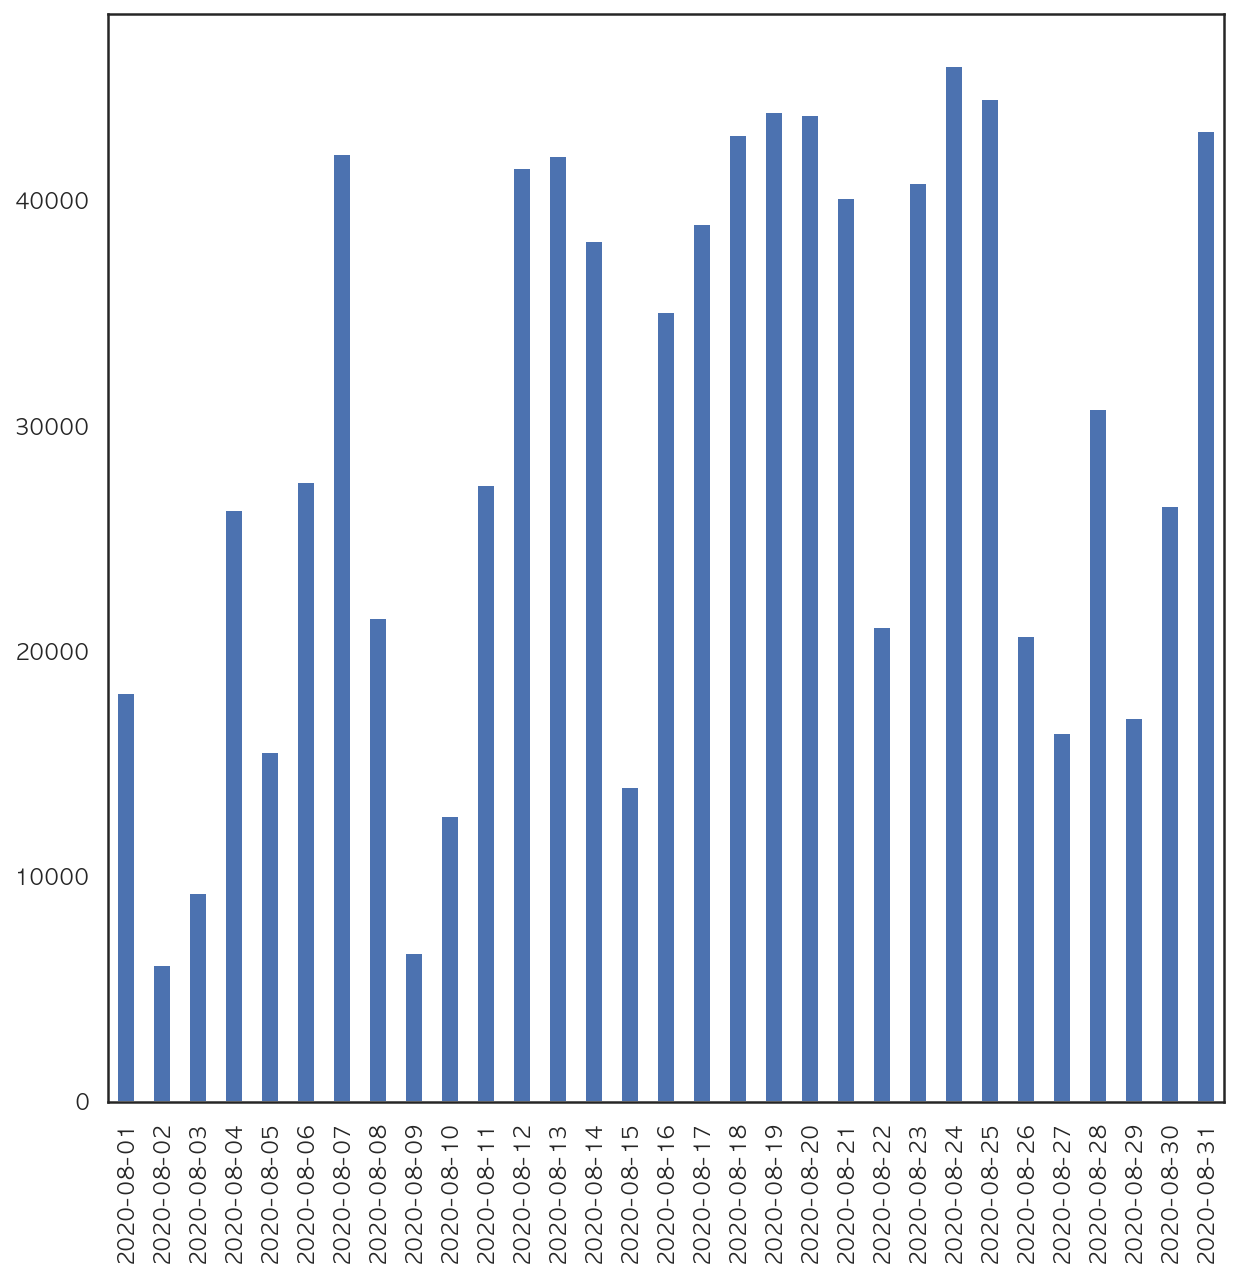

In [18]:
plt.figure(figsize=(10,10))
s1907.plot.bar()
plt.rc('font',family='AppleGothic')
plt.show()

plt.figure(figsize=(10,10))
s1908.plot.bar()
plt.rc('font',family='AppleGothic')
plt.show()

plt.figure(figsize=(10,10))
s2007.plot.bar()
plt.rc('font',family='AppleGothic')
plt.show()

plt.figure(figsize=(10,10))
s2008.plot.bar()
plt.rc('font',family='AppleGothic')
plt.show()

- 확인 결과 
  - 19년 07월 : 2,082,611 건 
  - 19년 08월 : 2,028,698 건 
  - 20년 07월 : 1,353,719 건
  - 20년 08월 : 900,358 건 
  - 19년도 7월 8월 총 이용량 : 4,111,309 건
  - 20년도 7월 8월 총 이용량 : 2,254,077 건 
   - 20년도가 19년도에 비해 -1,857,232 건으로 -54% 감소한 결과가 나왔습니다.

In [5]:
# 스테이션 위치
station['location'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [6]:
# 스테이션 갯수 나타내기 
location = station['location'].value_counts()
location

송파구     129
강서구     120
서초구     118
강남구     118
영등포구    106
마포구      99
종로구      94
노원구      88
구로구      86
강동구      84
양천구      80
은평구      77
성동구      76
서대문구     74
광진구      72
성북구      72
중랑구      70
동대문구     67
관악구      65
중구       65
동작구      62
용산구      60
금천구      55
도봉구      54
강북구      51
Name: location, dtype: int64

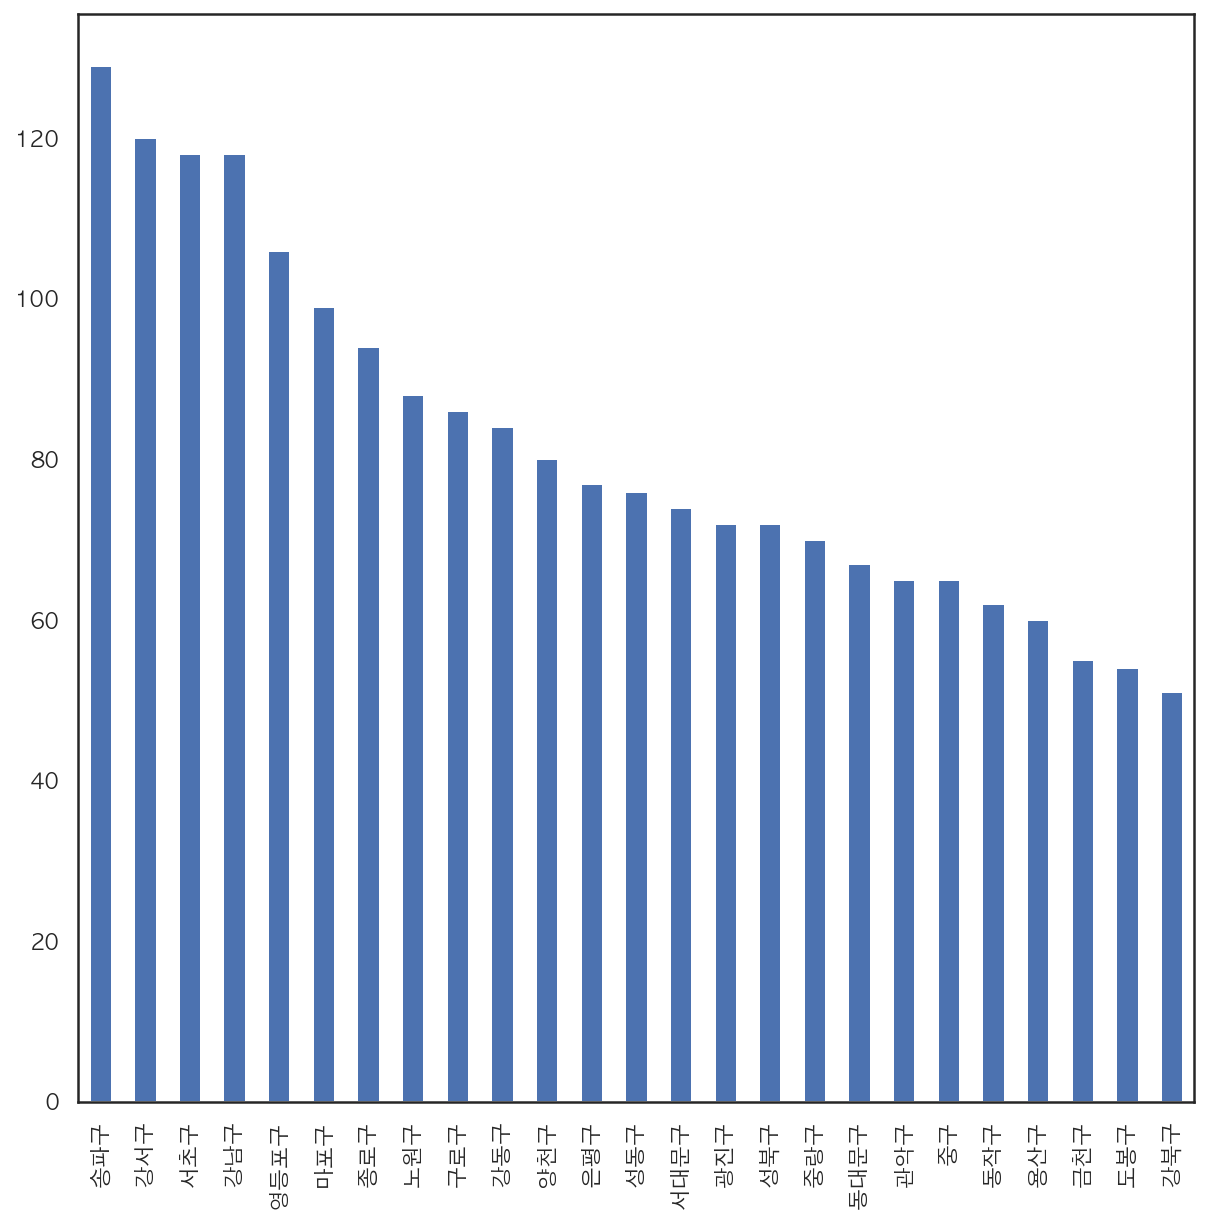

In [8]:
# 설치 장소 현황 그래프로 시각화
plt.figure(figsize=(10,10))
location.plot.bar()
plt.rc('font',family='AppleGothic')
plt.show()

In [9]:
sb1907_rent_station = sb1907['rental_station_name'].value_counts()[:21]
sb1907_rent_station

뚝섬유원지역 1번출구 앞              10317
여의나루역 1번출구 앞                9909
봉림교 교통섬                     8405
홍대입구역 2번출구 앞                7567
롯데월드타워(잠실역2번출구 쪽)           7349
건대입구역 사거리(롯데백화점)            6862
마곡나루역 5번출구 뒤편               6466
고속터미널역 8-1번, 8-2번 출구 사이     6442
안암로터리 버스정류장 앞               5824
동방1교                        5654
마포구민체육센터 앞                  5643
신도림역 1번 출구 앞                5601
양천향교역 7번출구앞                 5320
신대방역 2번 출구                  5160
가양역 8번출구                    4996
구로디지털단지역 앞                  4961
잠실새내역 5번 출구 뒤               4952
발산역 1번, 9번 인근 대여소           4838
당산역 10번출구 앞                 4832
자양사거리 광진아크로텔 앞              4662
CJ 드림시티                     4589
Name: rental_station_name, dtype: int64

In [26]:
mapo = station.loc[station['location'] == '마포구']
mapo

,station_num,station_name,location,longitude,latitude
920,101.0,(구)합정동 주민센터,마포구,37.549561,126.905754
921,102.0,망원역 1번출구 앞,마포구,37.555649,126.910629
922,103.0,망원역 2번출구 앞,마포구,37.554951,126.910835
923,104.0,합정역 1번출구 앞,마포구,37.550629,126.914986
924,105.0,합정역 5번출구 앞,마포구,37.550007,126.914825
925,106.0,합정역 7번출구 앞,마포구,37.548645,126.912827
926,107.0,신한은행 서교동금융센터점 앞,마포구,37.557510,126.918503
927,108.0,서교동 사거리,마포구,37.552746,126.918617
928,109.0,제일빌딩 앞,마포구,37.547691,126.919983
929,111.0,상수역 2번출구 앞,마포구,37.547871,126.923531


In [12]:
map = folium.Map(location=[mapo['longitude'].mean(), mapo['latitude'].mean()], zoom_start=12)

for n in mapo.index:
    # 팝업에 들어갈 텍스트를 지정 
    popup_name = mapo.loc[n, "station_name"]
    # 스테이션마다 아이콘 지정 
    if station.loc[n, 'station_name']:
        icon_color = "green"
    else:
        icon_color = "blue"
        
    folium.features.Marker(
        location=[mapo.loc[n, 'longitude'], mapo.loc[n, 'latitude']],
        radius=3,
        popup=popup_name,
        color=icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)
    
map

In [15]:
sb1907.head()

,rental_station_num,rental_station_name,return_station_num,return_station_name,using_time,using_distance,rental_day,rental_time,return_day,bicycle_type_num
0,153,성산2교 사거리,934,신사동 성당,43,6160.0,2019-07-01,00:49:10,01:33:11,1
1,2373,개포동역 사거리,2246,서울시 품질시험소 앞,19,4540.0,2019-07-01,08:20:55,08:40:42,1
2,2255,시민의숲역 1번출구 옆,2246,서울시 품질시험소 앞,9,1550.0,2019-07-01,08:35:20,08:44:56,1
3,2255,시민의숲역 1번출구 옆,2246,서울시 품질시험소 앞,7,1240.0,2019-07-01,08:37:26,08:45:25,1
4,2255,시민의숲역 1번출구 옆,2246,서울시 품질시험소 앞,6,1420.0,2019-07-01,08:41:45,08:48:40,1


In [21]:
sb1907['rental_station_name'].value_counts()

뚝섬유원지역 1번출구 앞        10317
여의나루역 1번출구 앞          9909
봉림교 교통섬               8405
홍대입구역 2번출구 앞          7567
롯데월드타워(잠실역2번출구 쪽)     7349
                     ...  
구룡터널 입구(개포1단지아파트)       28
이동정비                    27
서울월드컵경기장 테스트             1
영남단말기정비                  1
상암센터 정비실                 1
Name: rental_station_name, Length: 1541, dtype: int64

In [15]:
station

,station_num,station_name,location,longitude,latitude
0,301.0,경복궁역 7번출구 앞,종로구,37.575794,126.971451
1,302.0,경복궁역 4번출구 뒤,종로구,37.575947,126.974060
2,303.0,광화문역 1번출구 앞,종로구,37.571770,126.974663
3,304.0,광화문역 2번출구 앞,종로구,37.572113,126.977577
4,305.0,종로구청 옆,종로구,37.572582,126.978355
...,...,...,...,...,...
2037,1085.0,래미안 솔베뉴(고덕로),강동구,37.554569,127.145874
2038,1086.0,래미안 솔베뉴(구천면로),강동구,37.550598,127.145454
2039,1088.0,풍납사거리(강동),강동구,37.528122,127.119522
2040,1089.0,고덕 래미안힐스테이트(201동),강동구,37.560600,127.146698


In [43]:
mapo 

,station_num,station_name,location,longitude,latitude
920,101.0,(구)합정동 주민센터,마포구,37.549561,126.905754
921,102.0,망원역 1번출구 앞,마포구,37.555649,126.910629
922,103.0,망원역 2번출구 앞,마포구,37.554951,126.910835
923,104.0,합정역 1번출구 앞,마포구,37.550629,126.914986
924,105.0,합정역 5번출구 앞,마포구,37.550007,126.914825
925,106.0,합정역 7번출구 앞,마포구,37.548645,126.912827
926,107.0,신한은행 서교동금융센터점 앞,마포구,37.557510,126.918503
927,108.0,서교동 사거리,마포구,37.552746,126.918617
928,109.0,제일빌딩 앞,마포구,37.547691,126.919983
929,111.0,상수역 2번출구 앞,마포구,37.547871,126.923531


In [24]:
sb1907.groupby('rental_station_name').size()

rental_station_name
(구)신한은행 중랑교지점                                 1169
(구)합정동 주민센터                                   1014
3호선 매봉역 3번출구앞                                 1358
419민주묘지역                                      1321
8삼호@ 2동 ( 간선도로)                                421
9호선종합운동장역 9번출구                                2328
CJ 드림시티                                       4589
CJ오쇼핑앞                                         316
CJ제일제당 앞                                      1067
DMC빌 앞                                         846
DMC산학협력연구센터 앞                                 1933
DMC역 2번출구 옆                                   2385
DMC역 9번출구 앞                                   3227
DMC첨단산업센터                                      606
DMC홍보관                                        1331
IFC몰                                          4408
JK장평타워                                         440
JW타워                                           224
K+ 타워 앞                                       1183
KAIST 경영대학 

In [ ]:
folium.Map(loaction=[])

19년 07월 마포구 현황
망원1동주민센터                                      2214
망원2빗물펌프장 앞                                    2388
망원역 1번출구 앞                                    3791
망원역 2번출구 앞                                    2570
합정역 1번출구 앞                                    2246
합정역 5번출구 앞                                    1126
합정역 7번출구 앞                                    3705
(구)합정동 주민센터                                  1014
서교동 사거리                                       2026
신한은행 서교동금융센터점 앞                            3178
제일빌딩 앞                                         2307
상수역 2번출구 앞                                    1846
극동방송국 앞                                       1745
홍대입구역 2번출구 앞                                 7567
홍대입구역 8번출구 앞                                 3339
광흥창역 2번출구 앞                                   1746
서강나루 공원                                       1573
신수동 사거리                                        744
마포소방서 앞                                        960
신성기사식당 앞                                      1248
서강대 정문 건너편                                    1772
서강대 후문 옆                                      2491
서강대역 2번출구 앞                                   1752
서강대 남문 옆                                      1727
현대벤처빌 앞                                        626
신촌역(2호선) 1번출구 옆                               2626
신촌역(2호선) 6번출구 옆                               1540
신촌역(2호선) 7번출구 앞                               2194
대흥동 주민센터                                       426
아현역 4번출구 앞                                     754
공덕역 2번출구                                      1684
공덕역 5번출구                                      1460
공덕역 8번출구                                      3066
마포역 2번출구 뒤                                    2809
마포역 4번출구 뒤                                    2437
용강동 주민센터 앞                                   1693
마포구민체육센터 앞                                   5643
성산2교 사거리                                      1853
마포 신수공원 앞                                     1601
마포구 육아종합지원센터                                1081
마포구청 앞                                        3594
마포구청역                                         2952
마포어린이공원                                       1775
마포역 2번출구 뒤                                    2809
마포역 4번출구 뒤                                    2437
마포중앙도서관                                        917
가좌역 4번출구 앞                                    1696
가좌역1 번출구 뒤                                    1645
서울서부지방법원 앞                                    1187
애오개역 4번출구 앞                                   1688
망원초록길 입구                                       327
망원2빗물펌프장 앞                                    2388
하늘채코오롱아파트 건너편                               3730
SK망원동주유소 건너편                                 1985
마포 신수공원 앞                                     1601
월드컵공원                                          1693
월드컵경기장역 3번출구 옆                               2918
서울월드컵경기장 테스트                                   1
상암한화오벨리스크 1차 앞                               1191
상암월드컵파크 10단지 앞                                869
상암월드컵파크 1단지 교차로                              1385
상암월드컵파크 3단지 후문                                840
상암월드컵파크 7단지 앞                                 734
상암월드컵파크 9단지 앞                                1060
부엉이공원 앞                                        1032
DMC빌 앞                                           846
DMC산학협력연구센터 앞                                1933
DMC역 2번출구 옆                                   2385
DMC역 9번출구 앞                                   3227
DMC첨단산업센터                                     606
DMC홍보관                                         1331
LG CNS앞                                        1306
누리꿈스퀘어 옆                                     2953
상암중학교 옆                                        581
상암동주민센터 옆                                     1514
홈플러스 앞                                        3205
서울시 공공자전거 상암센터                             820
문화비축기지                                        576
롯데하이마트 (상암월드컵점)                            524
서울신용보증재단                                    1332
성산시영아파트                                      1066
이대역 4번 출구                                     743
이대역 5번출구                                      515
대흥역 1번출구                                      1307
성산2-1 공영주차장                                  2001



In [57]:
# 조건을 이용한 데이터 선택 
print(sb1907[sb1907['rental_station_name'].isin(['망원역 1번출구 앞'])])

         rental_station_num  rental_station_name  return_station_num  \
2811                     102          망원역 1번출구 앞                 130   
2998                     102          망원역 1번출구 앞                 210   
5881                     102          망원역 1번출구 앞                 186   
5882                     102          망원역 1번출구 앞                 186   
8405                     102          망원역 1번출구 앞                2219   
14802                    102          망원역 1번출구 앞                 119   
20756                    102          망원역 1번출구 앞                 184   
21099                    102          망원역 1번출구 앞                 184   
21702                    102          망원역 1번출구 앞                1169   
21952                    102          망원역 1번출구 앞                 125   
23770                    102          망원역 1번출구 앞                 202   
24722                    102          망원역 1번출구 앞                2040   
24723                    102          망원역 1번출구 앞                

In [53]:
# 빌린스테이션의 합을 구하려 했으나 실패
a = sb1907.groupby(['rental_station_name']).sum()
a = a.sort_values('rental_station_name',ascending =False)
a.head

<bound method NDFrame.head of                                            rental_station_num   \
rental_station_name                                              
희성오피앙                                                  1383316   
흑석한강푸르지오 106동앞                                          452016   
흑석역 4번출구                                               1106196   
흑석역 1번출구                                               6066900   
휘봉고등학교 앞                                                332212   
휘경공고앞                                                   396324   
휘경2동 주민센터                                                99600   
훈련원공원주차장 앞                                              440019   
효창동주민센터 앞                                               289696   
효창공원앞역 3번출구 뒤                                          1376100   
효자동 삼거리                                                 396900   
효성인텔리안 앞                                               4124545   
황금내근린공원                                       